In [1]:
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.2             magrittr_1.5         IRdisplay_0.4.4     
 [4] pbdZMQ_0.2-6         tools_3.3.3          crayon_1.3.4        
 [7] uuid_0.1-2           stringi_1.1.5        IRkernel_0.8.12.9000
[10] jsonlite_1.5         stringr_1.2.0        digest_0.6.12       
[13] repr_0.12.0          evaluate_0.10.1     

In [3]:
# we load a few packages
library(ggplot2)
library(corrplot)
library(reshape2)
library(caret)
library(MASS) # for LDA
library(klaR) # for pls
library(pls)
library(e1071)# for pls
library(pROC) # for pls
library(vegan)
require(scales)
require(gridExtra);

In [4]:
options(repr.plot.width=4, repr.plot.height=4)

In [5]:
#rm(list=ls(all=TRUE))

#dataset <- read.csv('/Users/jul/git/pipe-generate-dataset/dataset.csv', header=FALSE)
#dataClass <- read.csv('/Users/jul/git/pipe-generate-dataset/dataClass.csv', header=FALSE)

dataset <- read.csv2("/Users/jul/git/pipe-generate-dataset/dataset.csv",header=TRUE,sep=",",dec=".")
dataClass <- read.csv2("/Users/jul/git/pipe-generate-dataset/dataClass.csv",header=TRUE,sep=",",dec=".")

In [6]:
colnames(dataset) <- seq(1:768)

In [7]:

data <- data.frame("x"=I(dataset), "y"=as.factor(dataClass[,1]))

In [8]:
pca <- prcomp(data$x)

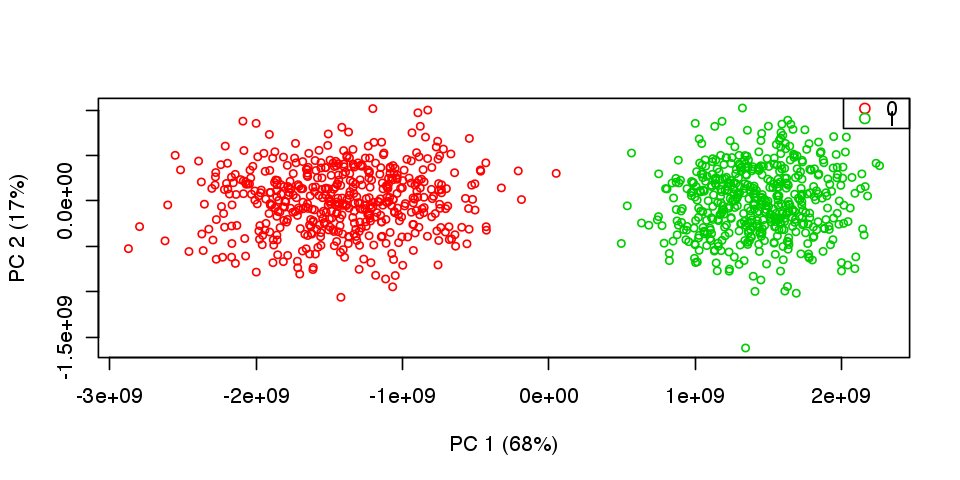

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
pc <- c(1,2)
COLOR <- c(2:4)
ev <- c(round(pca$sdev[pc[1]]/sum(pca$sdev)*100,0),
        round(pca$sdev[pc[2]]/sum(pca$sdev)*100,0),
        round(pca$sdev[pc[3]]/sum(pca$sdev)*100,0))
plot(pca$x[,pc[1]], pca$x[,pc[2]], col=COLOR[data$y], cex=0.7, 
     xlab=paste0("PC ", pc[1], " (", ev[pc[1]], "%)"), 
     ylab=paste0("PC ", pc[2], " (", ev[pc[2]], "%)"))
legend("topright", legend=levels(data$y), col=COLOR, pch=1)

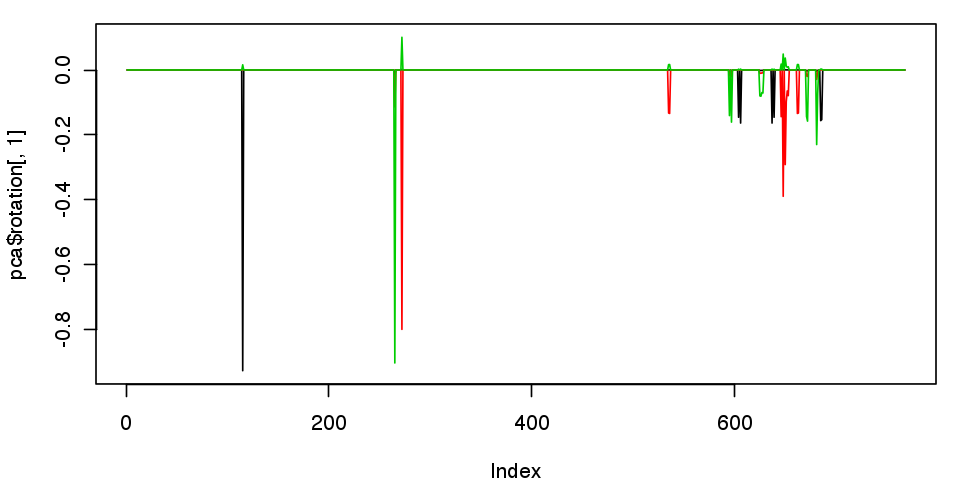

In [10]:
op <- par(mar = c(4,4,1,1))
plot(pca$rotation[,1], type='l', ylim=range(pca$rotation[,1:3]))
lines(pca$rotation[,2], type='l', col=2)
lines(pca$rotation[,3], type='l', col=3)
par(op)

Warning message in cor(data$x):
“the standard deviation is zero”

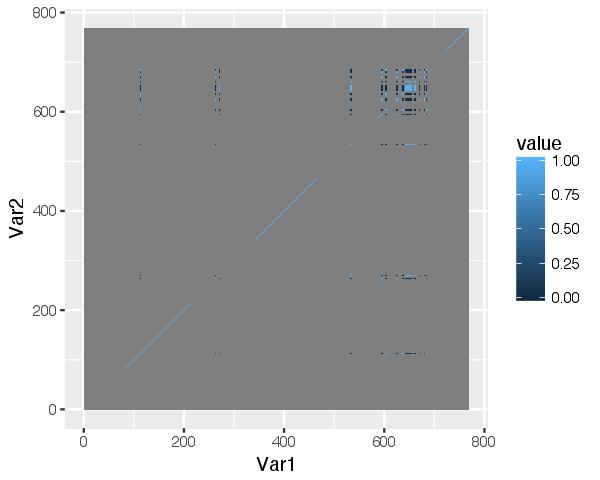

In [11]:
options(repr.plot.width=5, repr.plot.height=4)
qplot(x=Var1, y=Var2, data=melt(cor(data$x)), fill=value, geom="tile")

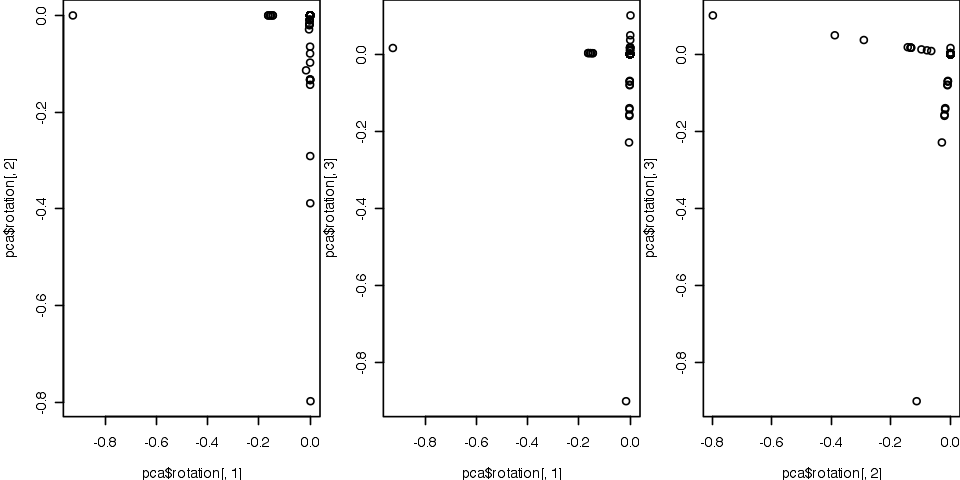

In [12]:
options(repr.plot.width=8, repr.plot.height=4)
layout(matrix(c(1,2,3), 1, 3, byrow = TRUE), 
       widths=c(3,3,3), 
       heights=c(1)) 
op <- par(mar = c(4,4,0,0))
plot(pca$rotation[,1],pca$rotation[,2]); 
plot(pca$rotation[,1],pca$rotation[,3]); 
plot(pca$rotation[,2],pca$rotation[,3])
par(op)

In [16]:
X<-as.matrix(dataset)
Y<-as.numeric(dataClass[,1])

In [17]:
nf = dim(X)[1]
T = c()
P = c()
C = c()
W = c()

In [18]:
for (j in 1:nf) {
  w = (t(X) %*% Y) %*% solve(t(Y) %*% Y)
  w1 = t(w) %*% w
  w2 = abs(sqrt(w1))
  w = w %*% solve(w2)
  t = (X %*% w)
  t1 = t(t) %*% t
  c = t(Y) %*% t %*% solve(t1)
  c1 = t(c) %*% c
  u = Y %*% c %*% solve(c1)
  u1 = t(u) %*% u
  u2 = abs(sqrt(u1))
  p = (t(X) %*% t) %*% solve(t1)
  X = X - (t)%*%t(p)
  T = matrix(c(T, t))
  P = matrix(c(P, p))
  C = matrix(c(C, c))
  W = matrix(c(W, w))
}

ERROR: Error in solve.default(t1): system is computationally singular: reciprocal condition number = 0


In [ ]:
T = matrix(T, ncol = nf)
T = scale(T, scale = TRUE, center = TRUE)
P = matrix(P, ncol = nf)
C = matrix(C, ncol = nf)
W = matrix(W, ncol = nf)

In [20]:
plot(T[,1], T[,2], col = factor(dataClass[,1]))
text(T[,1], T[,2], dataClass[,1], pos = 2)

ERROR: Error in T[, 2]: subscript out of bounds
